# Design and visualize arrays

In [10]:
import numpy as np
import doatools.model as model
from doatools.plotting import plot_array, plot_coarray
import matplotlib.pyplot as plt
%matplotlib inline

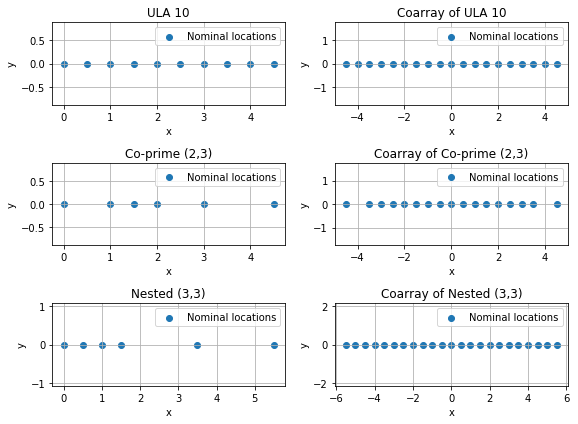

In [11]:
wavelength = 1.0 # Normalized
d0 = wavelength / 2.0

# Create some 1D arrays.
ula = model.UniformLinearArray(10, d0)
cpa = model.CoPrimeArray(2, 3, d0)
nea = model.NestedArray(3, 3, d0)

# Visualize these arrays and their difference coarrays.
arrays_1d = [ula, cpa, nea]
plt.figure(figsize=(8, 6))
for i, array in enumerate(arrays_1d):
    ax = plt.subplot(len(arrays_1d), 2, i * 2 + 1)
    plot_array(array, ax=ax)
    ax.set_title(array.name)
    ax = plt.subplot(len(arrays_1d), 2, i * 2 + 2)
    plot_coarray(array, ax=ax)
    ax.set_title('Coarray of ' + array.name)
plt.tight_layout()
plt.show()

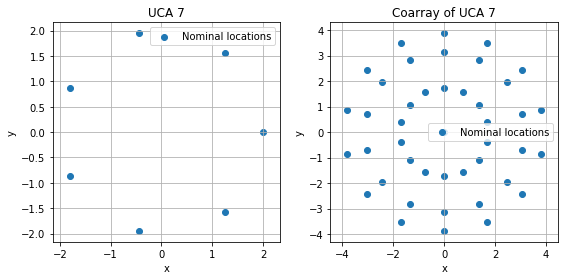

In [12]:
# You can also visualize 2D arrays and their coarrays.
uca = model.UniformCircularArray(7, 2.0)

plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 2, 1)
plot_array(uca, ax=ax)
ax.set_title(uca.name)
ax = plt.subplot(1, 2, 2)
plot_coarray(uca, ax=ax)
ax.set_title('Coarray of ' + uca.name)
plt.tight_layout()
plt.show()

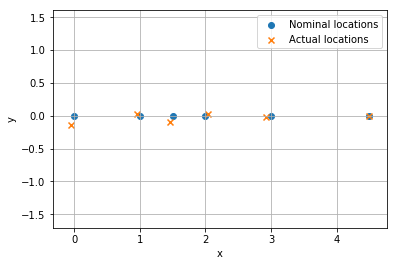

In [13]:
# You can also visualize location errors.
# We add some 2D location errors to a co-prime array.
cpa_perturbed = cpa.get_perturbed_copy({
    # Here True means the location errors are known in prior.
    # Because we are not doing estimations here, you can ignore it.
    'location_errors': (np.random.randn(cpa.size, 2) * 0.05, True)
})

# If `ax` is not specified, a new figure will be created and shown!
# `plot_array()` will return the axes.
ax = plot_array(cpa_perturbed, show_location_errors=True)

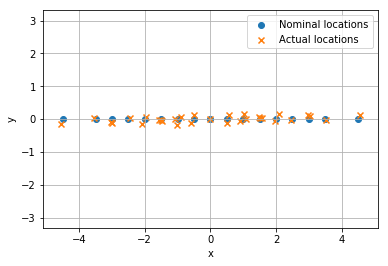

In [14]:
# You can also visualize the perturbed coarray!
# Observe that the difference coarray is greatly affected
# by location errors.
ax = plot_coarray(cpa_perturbed, show_location_errors=True)